In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import os, sys
import json
import pickle

### Чтение данных

In [2]:
file_path = '/data/share/lab04data'

In [3]:
train = os.path.join(file_path, 'lab04_train.csv')
test = os.path.join(file_path, 'lab04_test.csv')

In [4]:
nrows = None # None
df_train = pd.read_csv(train, sep=',', nrows=nrows)

In [5]:
len(df_train)

320764

In [6]:
df_test = pd.read_csv(test, sep=',', nrows=nrows)

In [7]:
len(df_test)

44399

In [8]:
df_test.head()

,Unnamed: 0,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,...,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR
0,372289,519130,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,87204,234045,0,0.013322,0.0,NaN,0.0,0.0,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,254415,401256,0,0.011870,0.0,NaN,0.0,0.0,0.0,0.666667,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,404229,551070,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,220444,367285,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [9]:
df_train.head()

,Unnamed: 0,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,333149,479990,0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,303639,450480,0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,327113,473954,0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,384197,531038,0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
4,202462,349303,0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0


### Чистка данных

In [10]:
# типы данных в df
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320764 entries, 0 to 320763
Columns: 117 entries, Unnamed: 0 to TARGET
dtypes: float64(101), int64(3), object(13)
memory usage: 286.3+ MB


In [11]:
df_train = df_train.loc[~df_train['TARGET'].isna()]

In [12]:
not_number_fields = []
number_fields = []
for col in list(df_train.columns):
    if df_train[col].dtype != np.float and df_train[col].dtype != np.int:
        not_number_fields.append(col)
    else: 
        number_fields.append(col)

In [13]:
number_fields.remove('TARGET')

In [14]:
df_train_target = df_train['TARGET']

In [15]:
df_train = df_train[number_fields]

In [16]:
df_test = df_test[number_fields]

In [17]:
df_train = df_train.fillna(value=0)

In [18]:
df_test = df_test.fillna(value=0)

In [19]:
df_train_target = df_train_target.fillna(value=0)

### Генерация признаков

In [20]:
X = df_train

### Кодирование целевой переменной

In [21]:
y = df_train_target

### Обучение

In [ ]:
# подбор гиперпараметров

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90], #высота дерева = кол-ву фичей
    #'max_features': [2, 3],
    'min_samples_leaf': [3, 4], # если в узле осталось меньше этого количества объектов то глубже не пойдем (борьба с переобучением)
    'min_samples_split': [8, 10, 12],# min значение которое еще делим (взаимозаменяемо с min_samples_leaf)
    'n_estimators': [100, 150, 200, 300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X, y)

# summarize the results of the grid search
print(grid_search.best_score_)
print("tuned hpyerparameters :(best parameters) ", grid_search.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] bootstrap=True, max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] bootstrap=True, max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] bootstrap=True, max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] bootstrap=True, max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=150 
[CV] bootstrap=True, max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=150 
[CV] bootstrap=True, max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=150 
[CV] bootstrap=True, max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV] bootstrap=True, max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV] bootstrap=True, max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV] bootstrap=True, max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=300

[CV]  bootstrap=True, max_depth=80, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=78.2min
[CV] bootstrap=True, max_depth=80, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=80.5min
[CV] bootstrap=True, max_depth=80, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=81.2min
[CV] bootstrap=True, max_depth=80, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=81.9min
[CV] bootstrap=True, max_depth=80, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, min_samples_leaf=4, min_samples_split=8, n_estimators=150, total=57.9min
[CV] bootstrap=True, max_depth=80, min_samples_leaf=4, min_samples_split=1

In [24]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 300}

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# разбиваем данные на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
clf = RandomForestClassifier(verbose=2, random_state=1, n_estimators=300, max_depth=80, min_samples_split= 12, min_samples_leaf= 4, n_jobs=5)

In [29]:
#from sklearn.linear_model import LogisticRegression

In [30]:
#clf = LogisticRegression(verbose=2)

In [31]:
# обучаем классификатор
clf.fit(X_train, y_train)

building tree 1 of 300
building tree 2 of 300building tree 3 of 300

building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300


[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   10.4s


building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78 of 300
building tree 79 of 300
building tree 80

[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:   46.0s


building tree 157 of 300
building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300


[Parallel(n_jobs=5)]: Done 300 out of 300 | elapsed:  1.5min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=5,
            oob_score=False, random_state=1, verbose=2, warm_start=False)

### Оценка предсказательной способности

In [32]:
y_pred = clf.predict_proba(X_test)

[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:    3.7s
[Parallel(n_jobs=5)]: Done 300 out of 300 | elapsed:    7.3s finished


In [33]:
from sklearn.metrics import roc_auc_score, roc_curve

In [34]:
roc_auc_score(y_test, y_pred[:,1])

0.8399518251584835

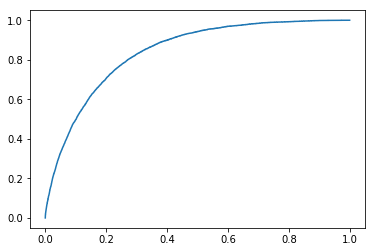

In [35]:
fpr, tpr, _= roc_curve(y_test, y_pred[:,1])
plt.plot(fpr, tpr)

### Ответ

In [35]:
y_ans = clf.predict_proba(df_test)

[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done 200 out of 200 | elapsed:    3.0s finished


In [36]:
target = y_ans[:,1]

In [37]:
id = df_test['ID']

In [38]:
ans = pd.DataFrame(data={'id': id, 'target': target})

In [39]:
ans.head(3)

,id,target
0,519130,0.346159
1,234045,0.001131
2,401256,0.025367


In [37]:
ans.to_csv('~/lab04.csv', sep='\t', index=False)

In [40]:
ans.to_csv('~/lab04s.csv', sep='\t', index=False)